Title: Computational Models of Neurons
Author: Thomas M. Breuel
Institution: UniKL

In [65]:

from IPython.core.display import Image 
def fig(x): return Image(filename="Figures/"+x+".png") 
from pylab import *
def figs(*args):
    for i,f in enumerate(args):
        subplot(1,len(args),i+1)
        axis("off")
        fig = imshow(imread("Figures/"+f+".png"))

# Neuron Models

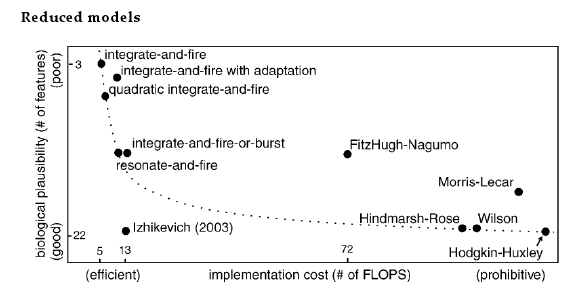

In [66]:
fig("neuron-models")

# Hodgkin-Huxley Model

(Hodgkin-Huxley Equations)

We have already seen the Hodgkin-Huxley model. It is given by this set of differential equations:

$$ C\frac{dV}{dt} = -g_L(V) (V-V_{Na}) - g_K(V) (V-V_K) - g_l(V) (V-V_l) + I_e $$

We used a simple model before, but the actual Hodgkin-Huxley model is:

$$g_i(V_m) = g_i\varphi^\alpha\chi^\beta$$

$$\dot{p}(V_m) = \rho_\phi(p_\infty - p)$$

$$\dot{q}(V_m) = \rho_\chi(q_\infty - q)$$

Here, $p,q$ are fractions of activated, inactivated channels. There are some empirical exponents $\alpha,\beta$ and rates that are fit against empirical measurements.

(Hodgkin-Huxley Equations)

membrane vs neuron:

- strictly speaking, these are membrane equations for the action potential
- we can use them to describe the whole neuron

whole neuron description:

- compute the HH equations at the trigger zone
- the external current $I_e(t)$ is what arrives at the trigger zone from the various inputs
- after the signal has been triggered at the trigger zone (according to HH), it just propagates out


# FitzHugh-Nagumo Model

(Simplified Dynamical System)

This model goes away from a physical description, but tries to capture most of the dynamic behavior of Hodgkin-Huxley.

$$ \dot{v} = v - v^3/3 - w + I_e $$
$$ \tau \dot{w} = v - a - bw $$

The idea is that we have...

- a voltage-like variable $v$
- an inhibitory variable $w$

You can find more information here: http://www.scholarpedia.org/article/FitzHugh-Nagumo_model

In [67]:
def fhm(v=0,w=0,a=0.0,b=0.0,tau=1.0,t=100,dt=1e-3,ie=lambda t:0.0):
    n = int(t/dt)
    ts = []; vs = []; ws=[]
    for i in range(n):
        t = i*dt
        vs.append(v); ws.append(w); ts.append(t)
        dv = (v-v**3/3.0-w+ie(t))*dt
        dw = ((v-a-b*w)/tau)*dt
        v = clip(v+dv,-100,100)
        w = clip(w+dw,-100,100)
    return ts,vs,ts,ws

With the default parameters of $a=b=0$, this is a nonlinear differential equation know as the _van der Pol oscillator_.



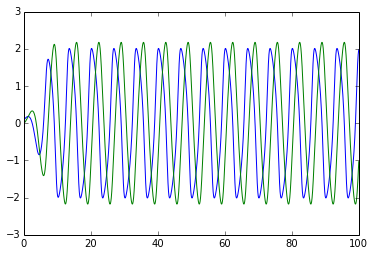

In [68]:
plot(*fhm(ie=lambda t:1.0 if t<0.1 else 0.0))

For other parameters, this generates neuron-like behavior. Here, the current injection at time $t=30$ generates a spike once it exceeds some threshold.

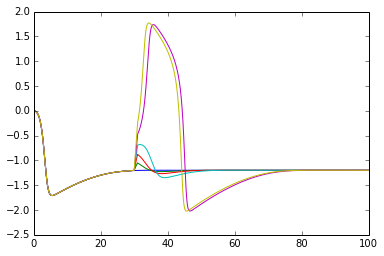

In [69]:
for c in linspace(0.0,0.9,6):
    plot(*fhm(a=-0.7,b=0.8,tau=1.0/0.08,ie=lambda t:c if t>30 and t<31 else 0)[:2])

Let's look at both variables. The current injection at time $t=30$ causes a fast rise in $v$ and a slower rise in the restorative variable $w$.



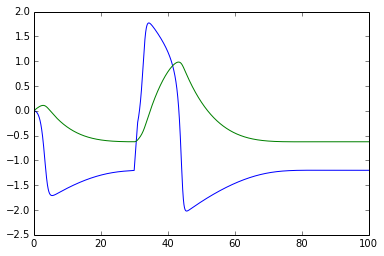

In [70]:
plot(*fhm(a=-0.7,b=0.8,tau=1.0/0.08,ie=lambda t:0.9 if t>30 and t<31 else 0))

Another way of looking at dynamical systems like this is in _phase space_.
Here, we ignore time and just plot one dynamical variable against the other.
The HH model exists in a four dimensional space, but for FHN, we only have two coordinates ($v$ and $w$).



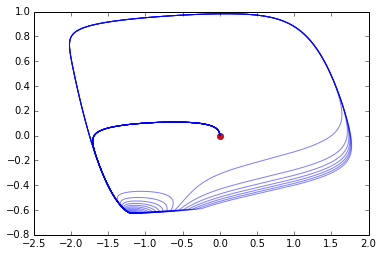

In [71]:
plot([0],[0],'o',c='red')
for c in linspace(0.0,0.9,20):
    plot(*fhm(a=-0.7,b=0.8,tau=1.0/0.08,t=100,ie=lambda t:c if t>30 and t<31 else 0)[1::2],c=(0,0,1,0.5))

Let's not inject current, but rather start of in different places in phase space.



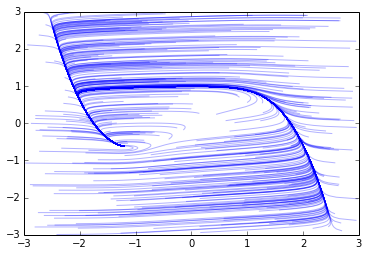

In [72]:
for i in range(400):
    v,w = 6*rand(2)-3
    plot(*fhm(v=v,w=w,a=-0.7,b=0.8,tau=1.0/0.08,t=500,dt=1e-1,ie=lambda t:0.0)[1::2],c=(0,0,1,0.3))

(Nullclines)

Nullclines are locations where one of the derivatives in the differential equations is zero.
The point where all derivatives are zero is a stationary pint.

$$\dot{v} = v - v^3/3 - w = 0 $$ 
$$ w = v - v^3/3$$

$$ \tau \dot{w} = v - a - bw = 0 $$
$$ w = v/b - a/b $$

Note that within each region in the arrangement of these curves, $\dot{v}$ and $\dot{w}$ have a constant sign.

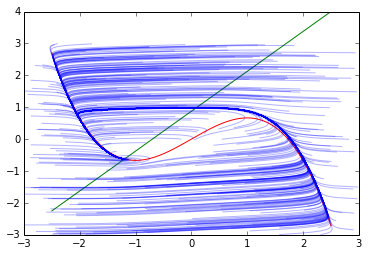

In [73]:
# Isoclines
vs = linspace(-2.5,2.5,1000)
plot(vs,vs-vs**3/3,c='red')
plot(vs,vs/0.8+0.7/0.8,c='green')
for i in range(400):
    v,w = 6*rand(2)-3
    plot(*fhm(v=v,w=w,a=-0.7,b=0.8,tau=1.0/0.08,t=500,dt=1e-1,ie=lambda t:0.0)[1::2],c=(0,0,1,0.3))

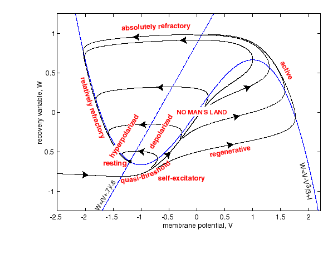

In [74]:
# FitzHugh Phase Space Portrait
figs("FitzHugh_portrait")



The reason this model is so popular is because it has a 2D phase space and is therefore easy to visualize and reason about.

# Exploring the Parameter Space

The FitzHugh-Nagumo model has a number of parameters.

Different choices of parameters give rise to different kinds of dynamic behavior. Let's look at some of this.

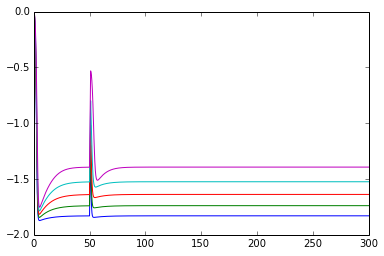

In [75]:
for a in linspace(-2.0,-1.0,5):
    plot(*fhm(a=a,b=0.8,tau=1.0/0.08,t=300,dt=1e-2,ie=lambda t:1.0 if t>50 and t<51 else 0)[:2])

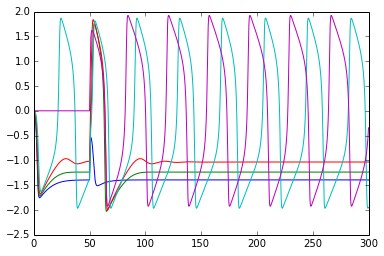

In [76]:
for a in linspace(-1.0,-0.0,5):
    plot(*fhm(a=a,b=0.8,tau=1.0/0.08,t=300,dt=1e-2,ie=lambda t:1.0 if t>50 and t<51 else 0)[:2])

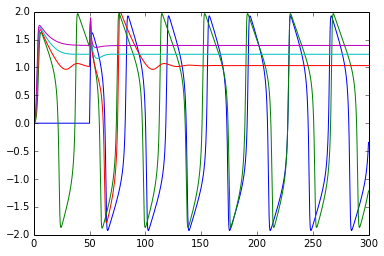

In [77]:
for a in linspace(0.0,1.0,5):
    plot(*fhm(a=a,b=0.8,tau=1.0/0.08,t=300,dt=1e-2,ie=lambda t:1.0 if t>50 and t<51 else 0)[:2])

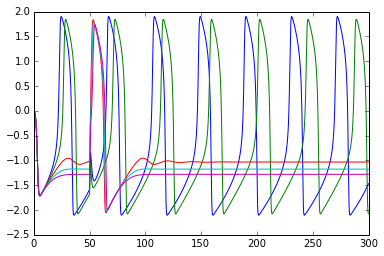

In [78]:
a=-0.7
for b in linspace(0.0,1.0,5):
    plot(*fhm(a=a,b=b,tau=1.0/0.08,t=300,dt=1e-2,ie=lambda t:1.0 if t>50 and t<51 else 0)[:2])

We could explore this for a long time. But let's automate the process.

We pick lots of random parameters for $a$ and $b$, then run the simulation.
In order to compare the results, we compute the resulting spectra.



In [79]:
params = []; spectra = []
for i in range(500):
    a = 4*rand()-2
    b = 4*rand()-2
    ts,vs = fhm(a=a,b=b,tau=1.0/0.08,t=300,dt=1e-2,ie=lambda t:1.0 if t>50 and t<51 else 0)[:2]
    vs = abs(fft(vs))**.5
    params.append((a,b))
    spectra.append((vs[:50]))

Let's look at the first 100 resulting spectra, kind of overlaid:



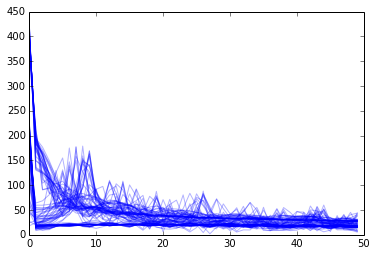

In [80]:
for i,s in enumerate(spectra[:100]):
    plot(s,c=(0,0,1,0.3))

It's hard to make sense of that plot. Let's _cluster_ the spectra into a number of different classes.



In [81]:
from sklearn import cluster
km = cluster.KMeans(6)
pred = km.fit_predict(array(spectra,'f'))
pred[:10],len(pred)

(array([4, 1, 4, 1, 0, 0, 1, 1, 0, 4], dtype=int32), 500)

Now we can look at the spectrum for each class.



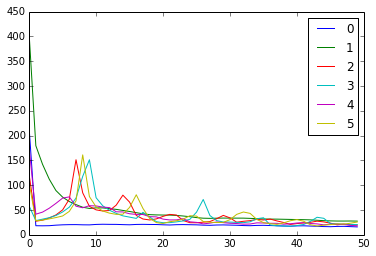

In [82]:
for i,s in enumerate(km.cluster_centers_):
    plot(s,label=str(i))
legend()

Let's look at the corresponding dynamic behaviors.



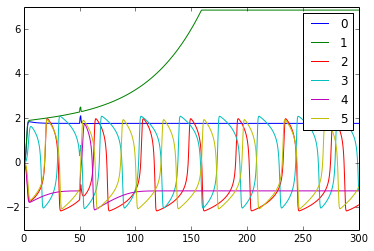

In [83]:
from random import choice
for i in range(amax(pred)+1):
    a,b = params[choice(find(pred==i))]
    plot(*fhm(a=a,b=b,tau=1.0/0.08,t=300,dt=1e-2,ie=lambda t:1.0 if t>50 and t<51 else 0)[:2],label=str(i))
legend()

It's also useful to see how these parameter values are distributed in parameter space.



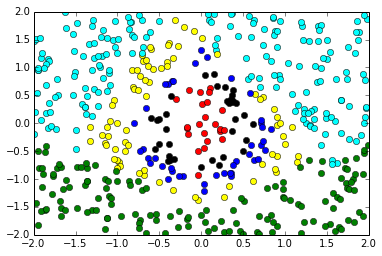

In [84]:
params = array(params)
colors = [["cyan","green","blue","red","yellow","black"][i] for i in pred]
for i,c in enumerate(pred):
    plot([params[i,0]],[params[i,1]],'o',c=colors[i])

# Integrate-and-Fire Models

(Integrate and Fire Model)

- earliest neuron model, developed by Lapique in 1907
- predates understanding of the action potential

Incoming signals charge a capacitor over time:

$$ C \dot{V} = I_e(t) $$

If the voltage rises above the threshold, output a spike and reset to zero.

(Leaky Integrate and Fire Model)

Problem with integrate-and-fire: infinite time memory.

Solution: add a small reset current.

$$ C\dot{V} = I_e(t) - \sigma V(t) $$


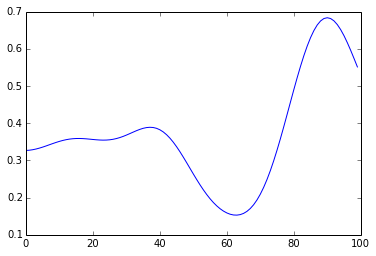

In [85]:
from scipy.ndimage import filters
ie = filters.gaussian_filter(rand(10000),10.0)
ie = (ie-amin(ie))/(amax(ie)-amin(ie))
plot(ie[:100])

In [86]:
def iaf(ie,cap=1.0,sigma=0.0,threshold=1.0):
    v = 0.0
    vs = []; outs = []
    for i,c in enumerate(ie):
        vs.append(v)
        dv = c/cap - sigma*v
        v = clip(v+dv,-10,10)
        if v>threshold:
            v = 0.0
            outs.append(1.0)
        else:
            outs.append(0.0)
    return vs,outs

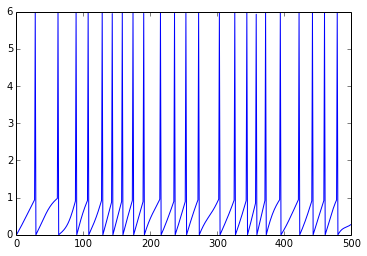

In [87]:
vs,outs = iaf(0.1*ie)
plot(5*array(outs[:500])+array(vs[:500]))

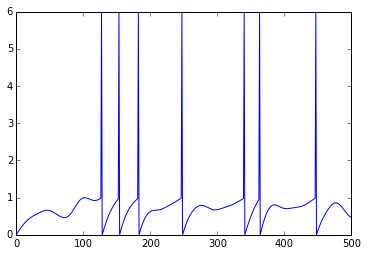

In [88]:
vs,outs = iaf(0.1*ie,sigma=0.05)
plot(5*array(outs[:500])+array(vs[:500]))

(Limitations of Integrate and Fire)

There is no oscillatory or bursting behavior in integrate-and-fire neurons.

This makes them a poor match to real-world neurons, and probably precludes many kind of signalling or spiking.

# Izhikevich Model

(The Model)

Nonlinear quadratic equation, similar to FitzHugh-Nagumo:

$$ C\dot{v} = k(v-v_\hbox{rest})(v-v_\hbox{thresh})-w+I $$
$$ \dot{w} = a(b(v-v_\hbox{rest})-w) $$

But additionally add reset from integrate-and-fire:

$$ u\leftarrow c, w\leftarrow u+d \hbox{ if } v\geq v_\hbox{peak} $$

This model has four independent parameters, $a$, $b$, $c$, and $d$.


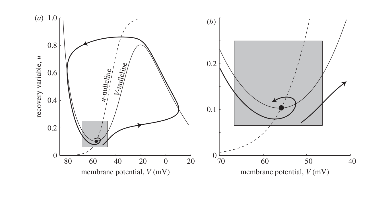

In [89]:
# Izhikevich Justification
figs("izhikevich-justification")

(Justification)

The reasoning behind Izhikevich is...

- what matters for the dynamic behavior is the nullclines
- neuron dynamics are primarily described by the behavior around the stationary point
- around the stationary point, you have a line and a parabola as nullclines
- once you're off to the right of the parabola, you have runaway signaling anyway
- we can "reset" the neuron more effectively with a threshold

Let's first write down the derivatives (the parameters come from the paper, more information here: http://www.izhikevich.org/publications/spikes.htm).

In [90]:
def izh_derivs(v=0,w=0,a=0.0,b=0.0,c=nan,d=nan,ie=0.0,dflt=nan):
    vdot = 0.04*v**2+5*v+140-w+ie
    wdot = a*(b*v-w)
    vdot = where(v>30,dflt,vdot)
    wdot = where(v>30,dflt,wdot)
    return (vdot,wdot)

In this model, the parameters have the following meanings:

- 30mV is the peak of the spike
- $c$ is the value that a spike is reset to
- $d$ is the the additional inhibition that results from a spike
- $b$ is the "sensitivity" of the inhibitory variable to the voltage
- $a$ is the decay rate for the inhibitory variable

http://www.izhikevich.org/publications/spikes.htm



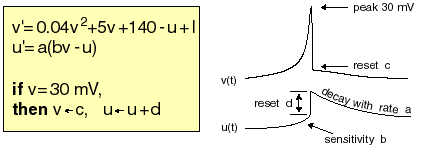

In [91]:
fig("izh-parameters")

Now that we have the derivatives, we can plot the regions in which the equations behave qualitatively different, by choosing different colors depending on the signs of the derivatives.

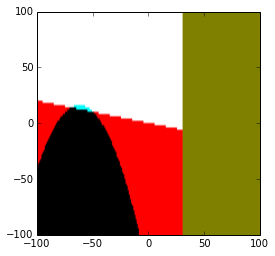

In [92]:
vs,ws = meshgrid(linspace(-100.0,100.0,200),linspace(-100.0,100.0,100))
vdots,wdots = izh_derivs(v=vs,w=ws,a=0.02,b=0.2,c=-65,d=2,dflt=0)
def rgbshow(r,g,b=None,**kw):
    if b is None: b = g
    imshow(transpose(array([r,g,b]),[1,2,0]),**kw)
rgbshow(0.5+sign(vdots)/2.0,0.5+sign(wdots)/2.0,sign(wdots),extent=(-100,100,-100,100))

(Question)

Can you enumerate the topologically distinct arrangements of these kinds of patterns?

Does enumerating them cover "all" possible behaviors (in some sense)?

Once we have the derivatives, we can use them inside a loop that drives forward the differential equation.

In [93]:
def izh(v=-65.0,w=0.0,n=500,dt=0.5,a=0.02,b=0.2,c=-65,d=2,ie=lambda t:0.0):
    t = 0
    result = []
    for i in range(n):
        t += dt
        v += (0.04*v**2+5*v+140-w+ie(t)) * dt
        w += (a*(b*v-w))*dt
        result.append((t,clip(v,-100,30),w))
        if v>30:
            v = c
            w = w+d
    return array(result)
    

With steady stimulation, we get a spike train.

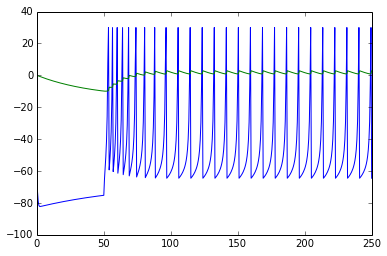

In [94]:
# steady state pulse in response to input
result = izh(ie=lambda t: 20.0 if t>50 else 0.0)
plot(result[:,0],result[:,1])
plot(result[:,0],result[:,2])

(Response to Different Input Stimuli)

Note that a higher input stimulus results in a higher output frequency.




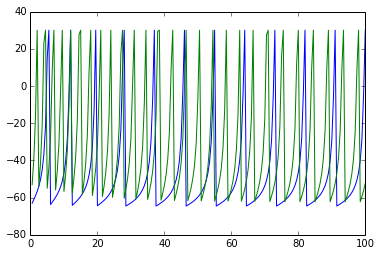

In [95]:
result = izh(ie=lambda t:20,n=200)
plot(result[:,0],result[:,1])
result = izh(ie=lambda t:40,n=200)
plot(result[:,0],result[:,1])

(Frequency Modulation)

We can think of the spike train as a frequency code or frequency modulation.

Once that spiketrain stimulates a target via a synapse and is temporally integrated, it turns back into an amplitude.

This way, we can think of neurons as passing around analog values:

- in the dendritic tree, values are coded as currents and voltages
- in the axon, values are coded as frequencies

We can also get many other kinds of behaviors out of these neurons.



In [96]:
# bursting behavior
result = izh(b=0.1,c=-50,ie=stimulus)
plot(result[:,0],result[:,1])
plot(result[:,0],result[:,2])

NameError: name 'stimulus' is not defined